In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import pairwise_distances

/home/kodolamacz/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kodolamacz/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kodolamacz/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/kodolamacz/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
np.set_printoptions(precision=3,suppress=True)

In [3]:
plt.style.context('ggplot');

In [4]:
colors = np.array(sns.color_palette('Set2',50))

## Summer GPS data
### Localize cities which was visited according to GPS logs

In [5]:
dane = pd.read_csv("Data2/summer-travel-gps-full.csv").iloc[:,:3]
dane.head(10)

,lat,lon,date
0,51.481292,-0.451011,05/14/2014 09:07
1,51.474005,-0.450999,05/14/2014 09:22
2,51.478199,-0.446081,05/14/2014 10:51
3,51.478199,-0.446081,05/14/2014 11:24
4,51.474146,-0.451562,05/14/2014 11:38
5,51.480146,-0.441103,05/14/2014 12:23
6,51.479669,-0.441024,05/14/2014 12:38
7,38.781775,-9.137544,05/14/2014 15:11
8,38.774422,-9.129195,05/14/2014 15:25
9,38.771939,-9.128911,05/14/2014 15:41


### Datetime

In [6]:
import datetime

In [7]:
d1 = datetime.datetime.strptime(dane.date[0],'%m/%d/%Y %H:%M')
d1

datetime.datetime(2014, 5, 14, 9, 7)

In [8]:
d2 = datetime.datetime.strptime(dane.date[1],'%m/%d/%Y %H:%M')
d2

datetime.datetime(2014, 5, 14, 9, 22)

In [9]:
diff = d2-d1
diff

datetime.timedelta(0, 900)

In [10]:
diff.total_seconds()/60.

15.0

In [11]:
diff2 = pd.to_datetime(dane.date[1]) - pd.to_datetime(dane.date[0])

In [12]:
diff2.total_seconds()

900.0

### Lat long

In [13]:
X = dane.iloc[:,:2]

In [14]:
X.shape

(1759, 2)

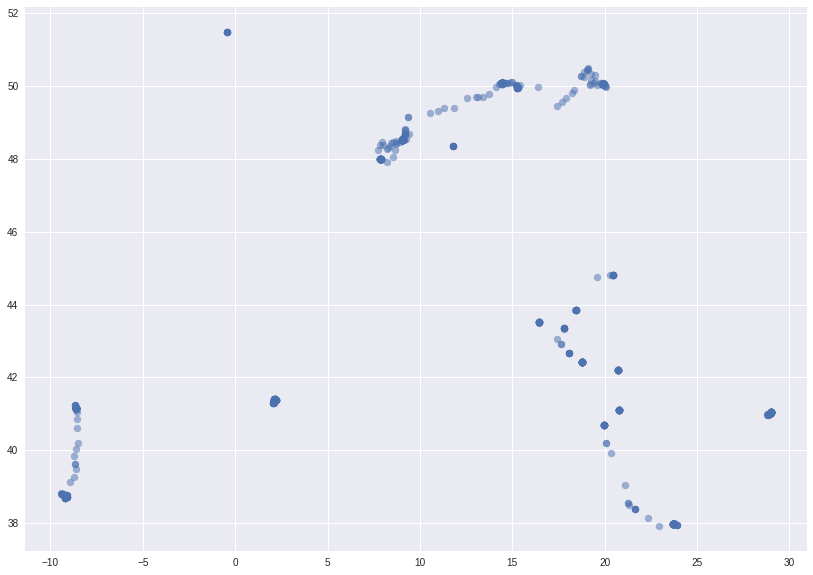

In [15]:
plt.figure(figsize=(14,10))
plt.scatter(dane.iloc[:,1],dane.iloc[:,0],alpha=0.5)
plt.show()

### DBSCAN

In [16]:
def haversine(pt1,pt2):
    '''
    The haversine formula determines the great-circle distance 
    between two points on a sphere given their longitudes and latitudes. 
    '''
    r = 6378.14
    (lat1,lon1) = np.deg2rad(pt1)
    (lat2,lon2) = np.deg2rad(pt2)
    
    sin_lat = np.sin((lat2-lat1)/2)
    sin_lon = np.sin((lon2-lon1)/2)
    
    return 2 * r * np.arcsin(np.sqrt(sin_lat * sin_lat + np.cos(lat1) * np.cos(lat2) * sin_lon * sin_lon))

In [17]:
haversine((50.06,19.93),(52.22,21.01))

251.99670431945023

In [18]:
distances = pairwise_distances(X,metric=haversine)

In [19]:
X.shape

(1759, 2)

In [20]:
distances.shape

(1759, 1759)

In [21]:
distances[:5,:5]

array([[0.   , 0.811, 0.485, 0.485, 0.796],
       [0.811, 0.   , 0.578, 0.578, 0.042],
       [0.485, 0.578, 0.   , 0.   , 0.59 ],
       [0.485, 0.578, 0.   , 0.   , 0.59 ],
       [0.796, 0.042, 0.59 , 0.59 , 0.   ]])

In [22]:
distances_sorted = np.sort(distances, axis=1)

In [23]:
k=8
distances_sorted[::10,:k]

array([[  0.   ,   0.485,   0.485, ...,   0.796,   0.811, 687.448],
       [  0.   ,   0.481,   0.694, ...,   4.724,   4.726,   4.728],
       [  0.   ,   0.061,   0.15 , ...,   0.245,   0.252,   0.332],
       ...,
       [  0.   ,   0.006,   0.008, ...,   0.211,   0.211,   0.213],
       [  0.   ,   0.952,   0.977, ...,   1.183,   1.185,   1.257],
       [  0.   ,   0.002,   0.003, ...,   0.003,   0.003,   0.003]])

### Expert's knowledge - city center ~4km and at least 25 logs in this range

In [24]:
dbscan = DBSCAN(eps=4,min_samples=25,metric=haversine,n_jobs=-1)

In [25]:
dbscan_labels = dbscan.fit_predict(X)

In [26]:
np.max(dbscan_labels)

12

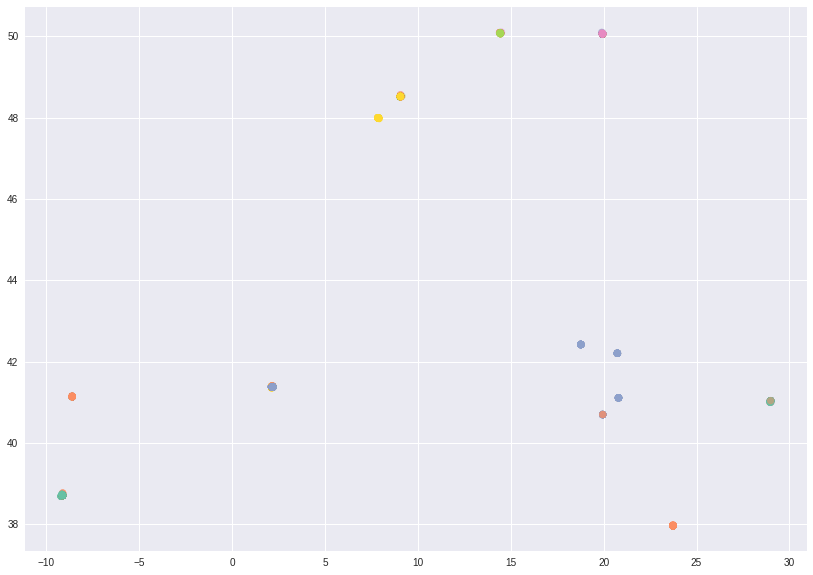

In [27]:
plt.figure(figsize=(14,10))
plt.scatter(X.iloc[:,1][dbscan_labels>=0],X.iloc[:,0][dbscan_labels>=0],c= colors[dbscan_labels],alpha=0.5)
plt.show();

### Find center of each cluster

In [35]:
poi['label'] = dbscan_labels[dbscan_labels>=0]

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
poi.head()

,lat,lon,label
8,38.774422,-9.129195,0
9,38.771939,-9.128911,0
10,38.769433,-9.124403,0
11,38.742987,-9.147780,0
12,38.712816,-9.139833,0


In [37]:
centers = poi.groupby('label').apply(lambda x: x.mean())

In [39]:
centers.shape

(13, 3)

In [40]:
centers.head()

,lat,lon,label
label,,,
0,38.713168,-9.143284,0.0
1,41.144038,-8.611845,1.0
2,41.382371,2.158363,2.0
3,50.061724,19.935976,3.0
4,50.077638,14.438636,4.0


### Merge with lat and long of European cities

In [41]:
cities = pd.read_csv('Data2/european_cities_us_standard.csv')

In [42]:
cities.columns = ['name','country','lat','lon']

In [43]:
cities.head()

,name,country,lat,lon
0,Andorra la Vella,AD,42.5000,1.5000
1,Canillo,AD,42.5833,1.6667
2,Encamp,AD,42.5333,1.6333
3,Escaldes-Engordany,AD,42.5000,1.5667
4,La Massana,AD,42.5667,1.4833


In [44]:
cities.shape

(252781, 4)

In [45]:
centers.shape

(13, 3)

In [47]:
distances = euclidean_distances(centers[["lat","lon"]],cities[["lat","lon"]])

In [48]:
distances.shape

(13, 252781)

In [49]:
distances_sorted_arg = np.argsort(distances,axis=1)

In [50]:
distances_sorted= np.sort(distances,axis=1)

In [51]:
distances_sorted[:,0]

array([0.01 , 0.008, 0.011, 0.029, 0.03 , 0.008, 0.026, 0.302, 0.301,
       0.005, 0.819, 2.602, 0.022])

In [52]:
spots = np.array(cities['name'][distances_sorted_arg[:,0]])

In [53]:
spots

array(['Lisboa', 'Porto', 'Barcelona', 'Krakw', 'Vinohrady', 'Tbingen',
       'Freiburg im Breisgau', 'Vitaljina', 'Golema Recica', 'Ohrid',
       'Radolista', 'Cesme', 'Istanbul'], dtype=object)

In [58]:
X.iloc[:,1][dbscan_labels>0].shape

(1360,)

<Figure size 1008x720 with 0 Axes>

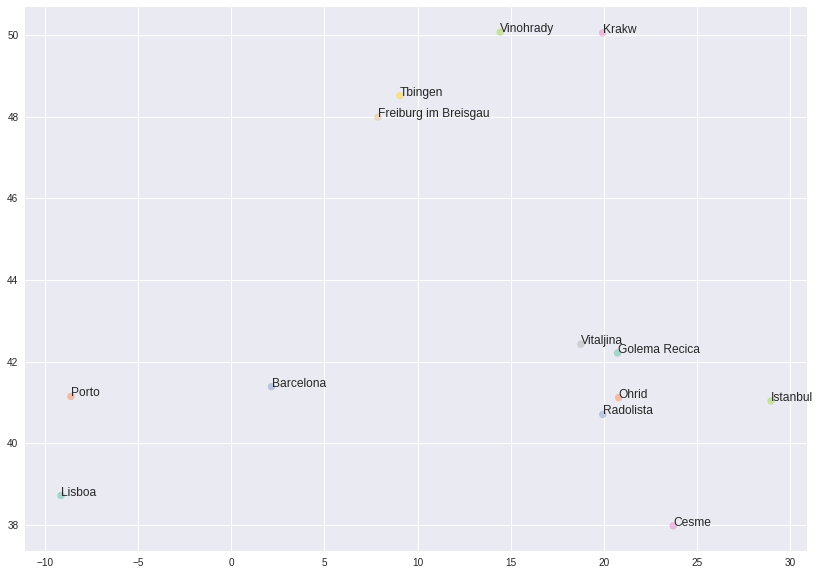

In [63]:
plt.figure(figsize=(14,10))
plt.scatter(centers.iloc[:,1],centers.iloc[:,0],c= colors[(centers.label).astype('int')],alpha=0.5)

for ind,spot in enumerate(spots):
    plt.text(centers.iloc[ind,1],centers.iloc[ind,0],spot)
plt.show();